In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

In [99]:
preds_current_stats = pd.read_csv('Preds_current_season.csv')

In [100]:
preds_current_stats = preds_current_stats.head(55)

In [101]:
szn_78 = pd.read_csv('teams_07_08.csv')
szn_89 = pd.read_csv('teams_08_09.csv')
szn_910 = pd.read_csv('teams_09_10.csv')
szn_1011 = pd.read_csv('teams_10_11.csv')
szn_1112 = pd.read_csv('teams_11_12.csv')
szn_1314 = pd.read_csv('teams_13_14.csv')
szn_1415 = pd.read_csv('teams_14_15.csv')
szn_1516 = pd.read_csv('teams_15_16.csv')
szn_1617 = pd.read_csv('teams_16_17.csv')
szn_1718 = pd.read_csv('teams_17_18.csv')

In [102]:
szn_lists = [szn_78, szn_89, szn_910, szn_1011, szn_1112, szn_1314, szn_1415, szn_1516, szn_1617, szn_1718]

In [103]:
full_szns = pd.concat(szn_lists, axis=0, ignore_index=True)

In [104]:
#dropping null rows
full_szns.loc[full_szns['away_wins'] ==0].index.to_list()
full_szns = full_szns.drop(full_szns.loc[full_szns['away_wins'] ==0].index.to_list())

In [105]:
PO_teams = full_szns.loc[full_szns['made_playoffs']=="Yes"]

In [106]:
noPO_teams = full_szns.loc[full_szns['made_playoffs']=="No"]

In [107]:
(PO_teams.away_wins+PO_teams.home_wins).median()

46.0

### Is 46 a good benchmark for how many wins we should aim for the predators to end up with?

In [108]:
PO_teams['total_wins'] = PO_teams.away_wins+PO_teams.home_wins
noPO_teams['total_wins'] = noPO_teams.away_wins+noPO_teams.home_wins
full_szns['total_wins'] = full_szns.away_wins + full_szns.home_wins

C:\Users\David\AppData\Local\Temp\ipykernel_1620\38687713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PO_teams['total_wins'] = PO_teams.away_wins+PO_teams.home_wins
C:\Users\David\AppData\Local\Temp\ipykernel_1620\38687713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noPO_teams['total_wins'] = noPO_teams.away_wins+noPO_teams.home_wins


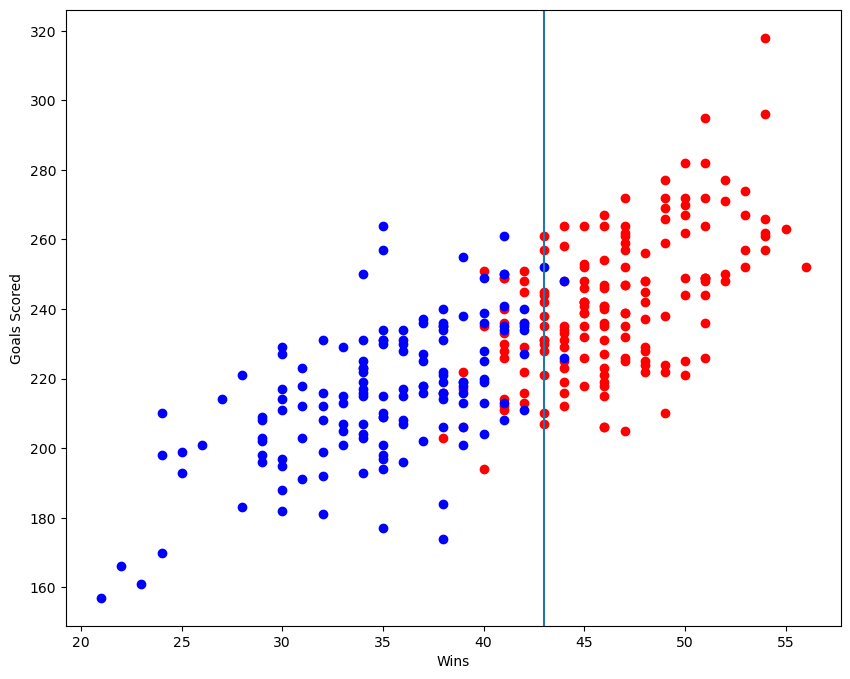

In [109]:
plt.figure(figsize=(10,8))
plt.scatter(x=PO_teams.total_wins,y = PO_teams.total_goals_scored,c="red")
plt.scatter(x=noPO_teams.total_wins,y = noPO_teams.total_goals_scored,c="blue")
plt.xlabel("Wins")
plt.ylabel("Goals Scored")
plt.axvline(x = 43)

### Based on this plot, it seems very likely that a team will make it to playoffs if they have more than 43 wins

### What about goals scored / allowed?

In [110]:
PO_teams['goal_diff'] = PO_teams.total_goals_scored-PO_teams.total_goals_against
noPO_teams['goal_diff'] = noPO_teams.total_goals_scored-noPO_teams.total_goals_against
full_szns['goal_diff'] = full_szns.total_goals_scored-full_szns.total_goals_against

C:\Users\David\AppData\Local\Temp\ipykernel_1620\2411080551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PO_teams['goal_diff'] = PO_teams.total_goals_scored-PO_teams.total_goals_against
C:\Users\David\AppData\Local\Temp\ipykernel_1620\2411080551.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noPO_teams['goal_diff'] = noPO_teams.total_goals_scored-noPO_teams.total_goals_against


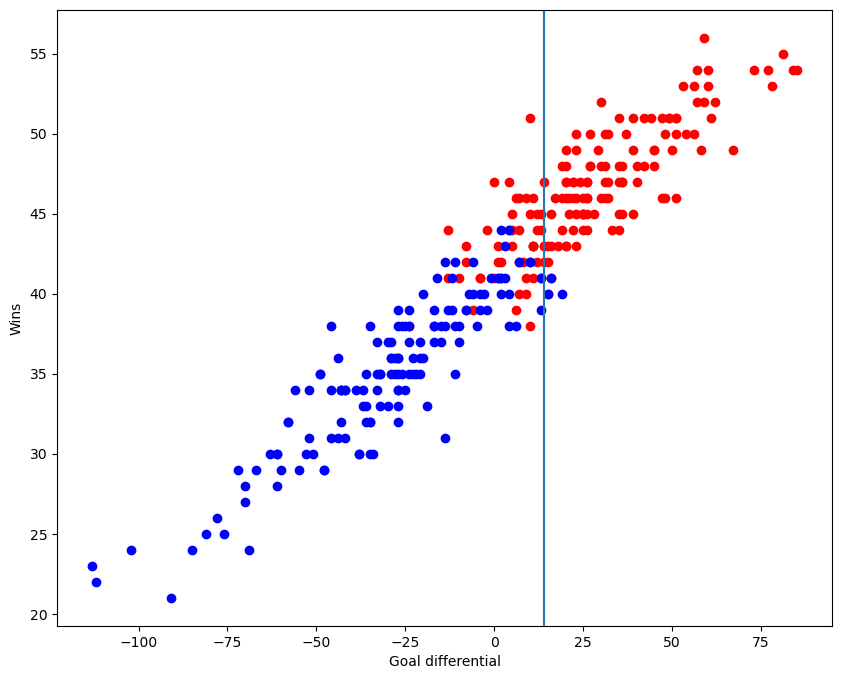

In [111]:
plt.figure(figsize=(10,8))
plt.scatter(x=PO_teams.goal_diff,y = PO_teams.total_wins,c="red")
plt.scatter(x=noPO_teams.goal_diff,y = noPO_teams.total_wins,c="blue")
plt.xlabel("Goal differential")
plt.ylabel("Wins")
plt.axvline(x = 14)

### If a team has a goal differntial of at least 14, they seem very likely to make it in to the playoffs. We can also see that wins and goal differential seem to have a linear relationship

<AxesSubplot:xlabel='goal_diff', ylabel='total_wins'>

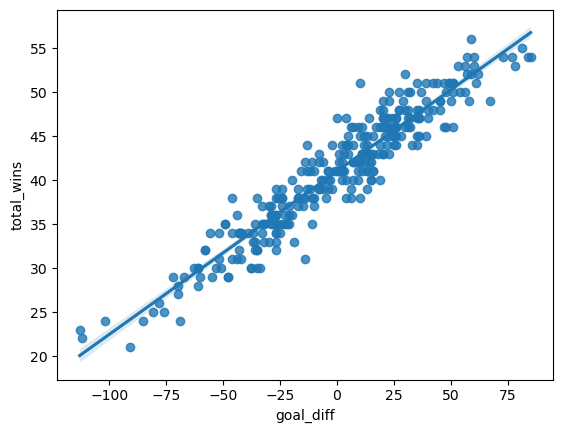

In [117]:
### do regplot
sns.regplot(x=full_szns.goal_diff, y = full_szns.total_wins, data=full_szns)

In [116]:
full_szns.corr()

,Unnamed: 0,away_wins,home_wins,away_losses,home_losses,total_goals_scored,total_goals_against,total_wins,goal_diff
Unnamed: 0,1.000000,-0.321791,-0.287193,0.321791,0.287193,-0.163022,0.409971,-0.354361,-0.378067
away_wins,-0.321791,1.000000,0.474713,-1.000000,-0.474713,0.600182,-0.636668,0.855180,0.813322
home_wins,-0.287193,0.474713,1.000000,-0.474713,-1.000000,0.637289,-0.605386,0.862170,0.816770
away_losses,0.321791,-1.000000,-0.474713,1.000000,0.474713,-0.600182,0.636668,-0.855180,-0.813322
home_losses,0.287193,-0.474713,-1.000000,0.474713,1.000000,-0.637289,0.605386,-0.862170,-0.816770
total_goals_scored,-0.163022,0.600182,0.637289,-0.600182,-0.637289,1.000000,-0.156841,0.720783,0.755823
total_goals_against,0.409971,-0.636668,-0.605386,0.636668,0.605386,-0.156841,1.000000,-0.722997,-0.765216
total_wins,-0.354361,0.855180,0.862170,-0.855180,-0.862170,0.720783,-0.722997,1.000000,0.949169
goal_diff,-0.378067,0.813322,0.816770,-0.813322,-0.816770,0.755823,-0.765216,0.949169,1.000000


### Above, the regression line can be seen. Also, the correlation coefficient between goal_diff and total_wins is 0.95 - very high!

In [118]:
### do part two later